#### Data Camp - Introduction to Deep Learning in Python

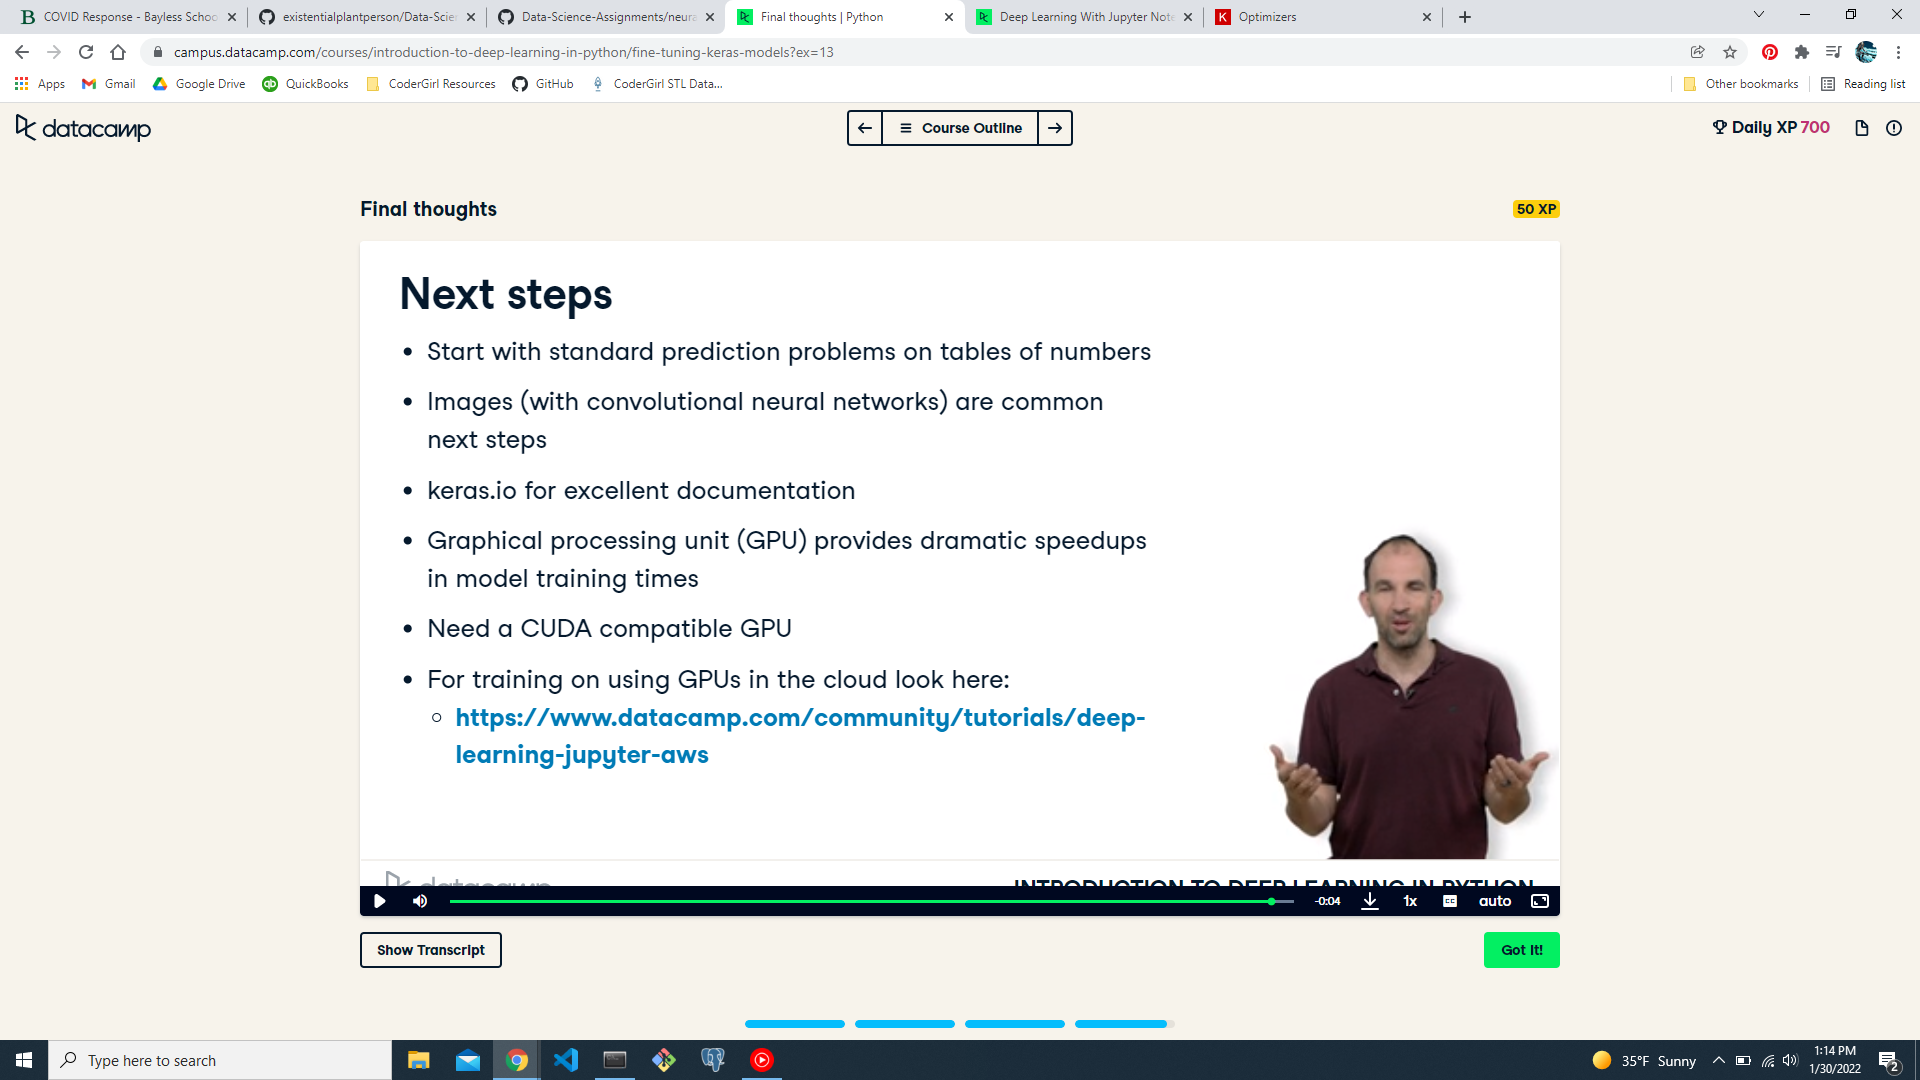

### Chapter 1 - Basics of deep learning and neural networks

In Linear regression, the target is the sum of individual features wile deep learning allows for interactions between features

- Neural networks account for interactions really well
- deep learning uses especially powerful neural networks
    - can use text, images, video, audio, source code, etc
    
Interactions in neural network
- far left layer holds inputs
- far right layer hold target
- layers in between are hidden layers and contain nodes (aggregation of information from another layer) that add to the complexity of interactions in  the model

###### Forward propagation
- using data to make predictions
- lines connect input to each hidden layers with weights for each connection
    - these weights are modified during parameter tuning
- multiply and add process (dot product)
    - multiply the previous layer time weight and sum all of the lines going into that node
- forward propagation code
        import numpy as np
        input_data = np.array([2,3])
        weights = {'node_0': np.array([1,1]),
                   'node_1': np.array([-1,1]),
                   'output': np.array([2,-1])}
        node_0_value = (input_data * weights['node_0']).sum()
        node_1_value = (input_data * weights['node_1']).sum()
        
        #verify manually
        hidden_layer_values = np.array([node_0_value, node_1_value])
        print(hidden_layer_values) 
        # OUTPUT: [5,1]
        output = (hidden_layer_values * weights['output']).sum()
        # OUTPUT: 9

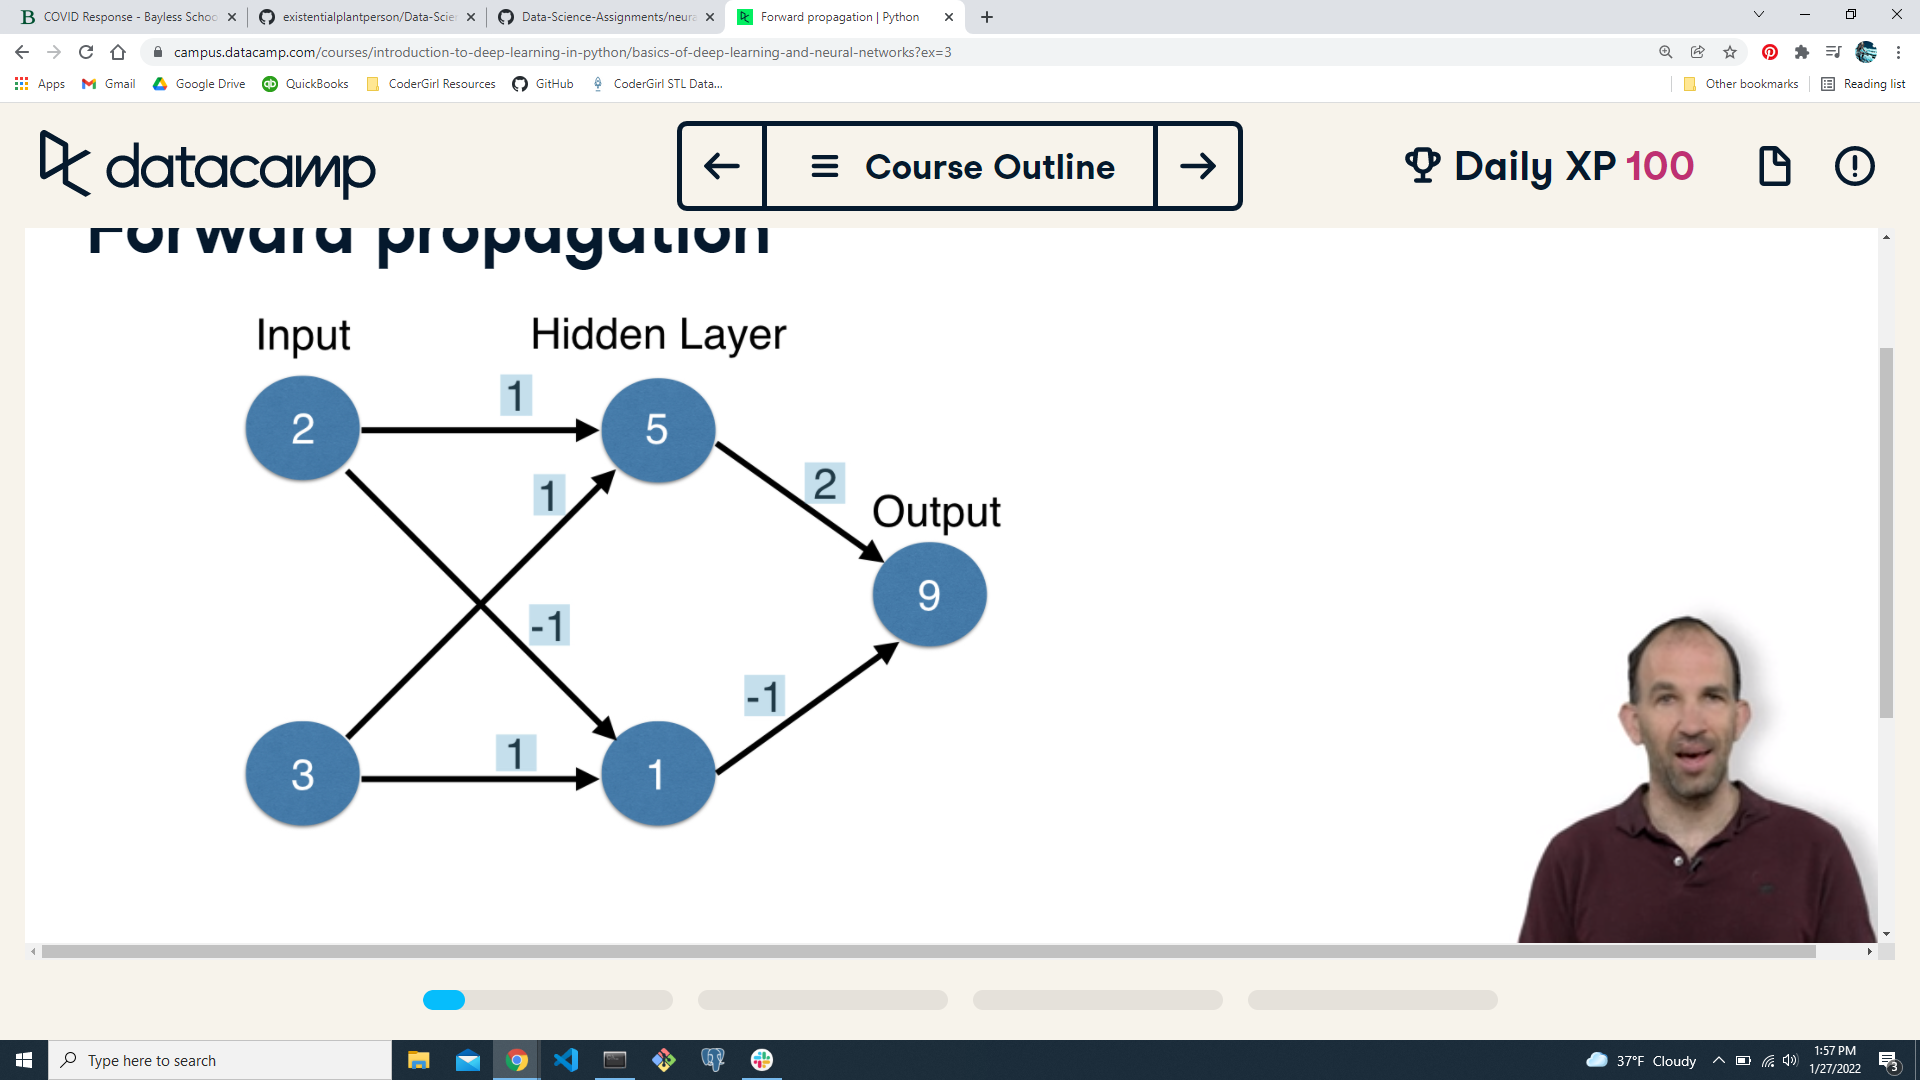

In [ ]:
## Coding the forward propagation algorithm

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

OUTPUT:
    [-39]

###### Activation functions

- to achieve maximum predictive power, apply activation function to capture non-linear relationships
- "activation function" is a function applied at each node. It converts the node's input into some output.
- in above model, the value of 5 in the top node of the hidden layer would be tanh(5); tanh is one method
- most commonly use ReLu (Rectified Linear Activation) function now
    - RELU(x) = 0 if x < 0 and x if x >= 0  
- coding activation functions is similar to above code, but distinguish input from output variables

        input_data = np.array([-1,2])
        weights = {'node_0': np.array([3,3]),
                   'node_1': np.array([1,5]),
                   'output': np.array([2,-1])}
        node_0_input = (input_data * weights['node_0']).sum()
        node_0_output = np.tanh(node_0_input)
        
        node_1_inuput = (input_data * weights['node_1']).sum()
        node_1_output = np.tanh(node_1_input)
        
        hidden_layer_outputs = np.array([node_0_input, node_1, output])
        output = (hidden_layer_outputs * weights['output']).sum()
        
        print(output)

In [ ]:
## The Rectified Linear Activation Function

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

OUTPUT:
52

In [ ]:
## Applying the network to many observations
## define a function called predict_with_network() 
## which will generate predictions for multiple data observations, 
## which are pre-loaded as input_data

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

###### Deeper Networks
modern models now have many complex hidden layers (up to 1000!) - process is the same

-internaly build represnetation of pattern in the data
- find increasingly complex patterns; can partially replace the need for feature engineering
- also called representation learning because layers build increasinfly sophisticated representations of raw data until output is achieved

- modeler doesn't need to specify interactions
    - when model is trained, the neural network gets weights that find the relevant patterns to make better predictions

In [ ]:
## Multi Layer Neural Networks

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

OUTPUT:
    182 (prediction)

## CHAPTER 2 - Optimizing with Backward Propagation
###### The Need for Optimization

- Model weights are important, a model that ouputs 9 when the actual value is 13 (error = 4) could have the final weights modified to achieve the ouput of 13 (error = 0)
- making acurate predictions gets harder with more points
    - at any set of weights, there are many values of the error corresponding to the many points we are making predictions for
    - LOSS FUNCTION - aggregates errors in predictions from many points into a single number (like MSE/RMSE/MAE in Regression)
    - lower loss functions is a better model
    
-- Gradient Descent - used to find the weights that give the lowest value for the loss function
    - looking for the weight with the lowest loss visualized:

In [ ]:
## Coding how weight changes affect accuracy

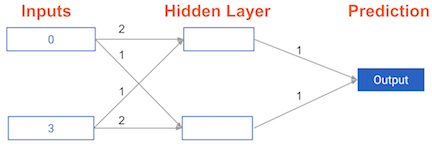

In [ ]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

In [ ]:
## Scaling up to multiple data points

from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

OUTPUT:
    Mean squared error with weights_0: 37.500000
    Mean squared error with weights_1: 49.890625

###### Gradient Descent

- If the slope is positive
     - going opposite the slope means moving to lower numbers
     - subtracting the slope from current value might ber too big a step
- solution : learning rate
    - update each weight by subtracting learning rate * slope
    - learning rates are often around 0.01
- slope calculation, need to multiply:
    - slope of loss function with respect to value at the node we feed into
    - value of the node that feeds our weights
    - slope of the activation function w.r.t value we feed into
    
- slope of mean-squared loss function w.r.t prediction:
        2*(predicted value - actual value) = 2 * error = 2 * -4
        *3
        (no activation function here)
        2*-4*3 = -24
        if learning rate is 0.01, the new weight would be
        2 - 0.01(-24) = 2.24
        
- code to calculate slopes and update weights
        weights = np.array([1,2])
        input_data = np.array([3,4])
        target = 6
        learning_rate = 0.01
        preds = (weights * input_data).sum()
        error = preds - target
        print(error)
        
        #slope calculation
        #an array of slopes is a gradient
        gradient = 2 * input_data * error
        gradient output: array([30, 40])
        
        weights_updated = weights - (learning rate * gradient)
        preds_updated = (weights_updated * input_data).sum()
        error_updated = preds_updated - target
        print(error_updated)

In [ ]:
## Calculating Slopes
## When plotting the mean-squared error loss function against predictions, 
## the slope is 2 * x * (xb-y), or 2 * input_data * error. 
## Note that x and b may have multiple numbers (x is a vector for each data point, 
## and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

OUTPUT:
    [14 28 42]
    # now use this slope to improve the weights of the model

In [ ]:
## Improving Model Weights

# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

OUTPUT:
    7
    5.04

In [ ]:
## Making multiple updates to weights

## To keep your code clean, there is a pre-loaded get_slope() function 
## and get_mse() function that takes the same arguments, input_data, target, and weights

## This network does not have any hidden layers, 
## and it goes directly from the input (with 3 nodes) to an output node. 
## Note that weights is a single array.

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - (0.01 * slope)
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

OUTPUT: visualization, MSE decreases drastically as Iterations increase

###### Backpropagation

- takes error through output layers and propagates backwards towards inputs
- allows gradient descent to update all weights in neural network 
- comes from chain rule of calculus
- important to understand process, but generally a library implements this

- big picture: estimate the slope of the loss function with respect to each weight
- always do forward propagation first to calculate pred and errors

- go back one layer at a time 
- gradients for weight is product of:
    - node value feeding into that weight
    - slope of loss function wrt node it feeds into
    - slope of activation function at the node it feeds into (for relu the slop of activation is 1)

- need to keep track of the slopes of the loss function wrt node values
- slope of node values are the sum of the slopes for all weights that come out of them

- Each time you generate predictions using forward propagation, you update the weights using backward propagation.

###### Backpropagation in practice
    1 >>>1
                7  (target = 4)
    3 >>>2
    
- weights are 1 and 2
- node values feeding these weights are 1 and 3

multiply three things to get slope of loss function:
- relevenat slope for output node is 2*error = 2*3 = 6
- slope of activation function using relu for positive value = 1
- slope of top weight 
- top node slope = 6*1*1 = 6
- bottom node slope = 6*1*3 = 18

one layer back, red shows calculated slope
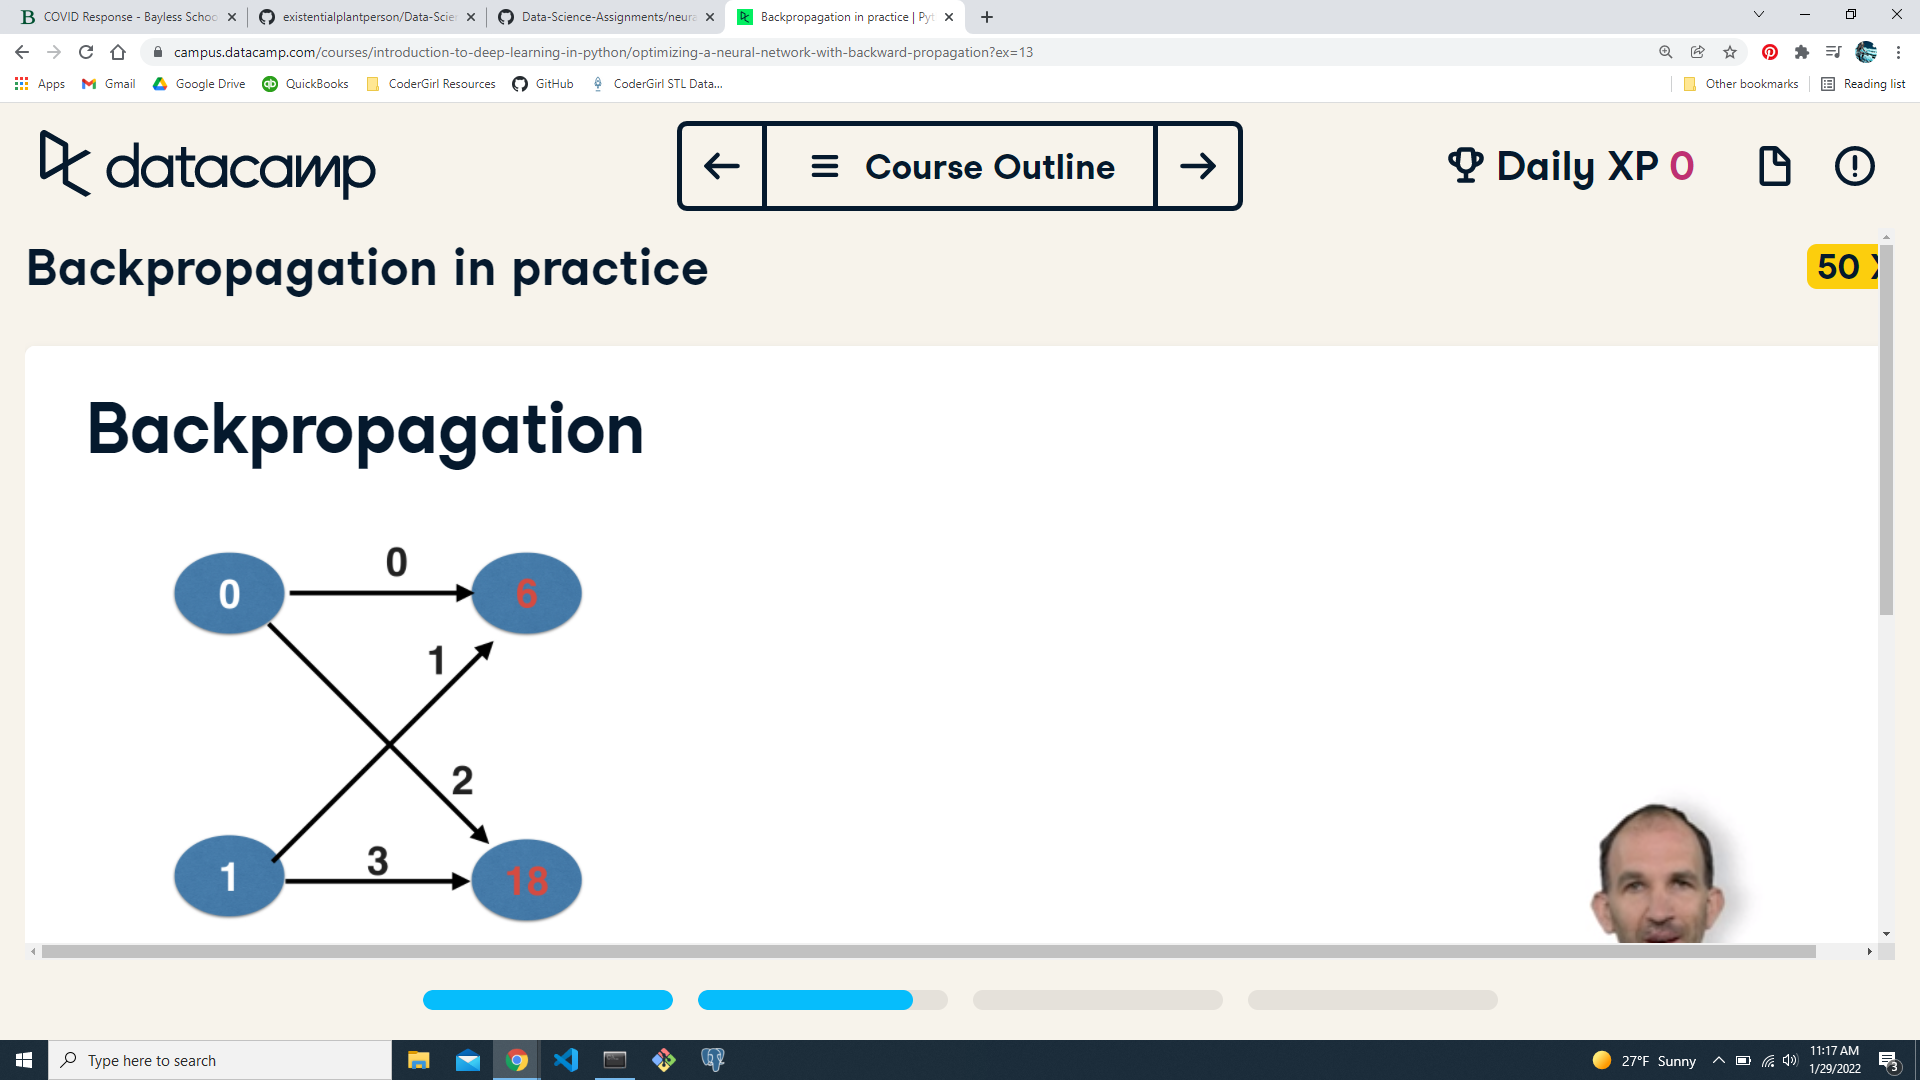

now calculate slope of loss function with respect to the weights in diagram above
- value at node feeding into weight
- slope of activation for the node being fed into (relu, all positive = 1) 
- slope of loss function with respect to output node

        current weight value  -  gradient
                0                  0  (0*1*6)
                1                  6  (1*1*6)
                2                  0  (0*1*18)
                3                  18 (1*1*18)
        

Backpropagation: Recap
- start at random set of weights
- use forward propagation to make prediction
- use backwards proipagation to calculate the slope of the loss function w.r.t each weight
- multiply that slope by the learning rate and subtract from the current weights
- keep going with that cycle until we get to a flat part


Stochastic gradient descent
- it is common to calculate slopes on only a subset of the data (a batch)
- use a different batch of data to calculate the next update
- start over from the beginning once all data is used
- each time through the training data is called an EPOCH
- when slopes are calculated on one batch at a times - called STOCHASTIC GRADIENT DESCENT

## CHAPTER 3 Deep Learning Models with Keras

Keras interface to TensorFlow deep learning library

Building steps
- specify architecture (number of layers, nodes, activation functions, etc)
- compile (specify loss function and specify optimization)
- fit (cycle of backpropagation and optimzation)
- predict

Model Specification
        import numpy as np
        from keras.layers import Dense
        from keras.models import Sequential 
        
        #specify the number of columns = # of nodes in input layer
        predictions = np.loadtxt('predictors_data.csv', delimiter=',')
        n_cols = predictors.shape[1]
        
        #build a sequential model
        #each layer has weights/connections only to the layer coming directly after it in the network diagram
        model = Sequential()
        
        #start adding layers
        #dense layer = all the nodes in the previous layer connect to all the nodes in the current layer 
        #specify number of nodes, activation function, input shapes (n_cols = number of columns, and empy after comma means any number of rows
        # any number of hidden nodes here
        
        model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
        model.add(Dese(100, activation='relu'))
        
        #output layer
        model.add(Dense(1))

In [ ]:
## Specifying a model

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
n_cols
# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))



###### Compiling and Fitting a Model

- specify optimizer to set learning rate
    - many options 
    - adam is usually a good choice, adjusts rate throughout process
- loss function
    - mean squared error is common for regression
    
Compiling a model
        n_cols = predictors.shape[1]
        model = Sequential()
        model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
        model.add(Dese(100, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
Fitting a model
- applying back propagation and gradient descent with your data to update weights
- scalinf data before fitting can ease optimization
        
        model.fit(predictors, target)

In [ ]:
## Compiling and fitting the model

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(predictors, target)

###### Classification Models

- 'categorical_crossentropy' loss function
    - similar to log loss (lower value is better)
- metrics = ['accuracy'] to compile step for easy to understand diagnostics
- output layer has separate node for each possible outcome 
- activation = 'softmax' for output layer

- transforming to categorical
- one hot encode outcomes 
        from keras.utils.np_utils import to_categorical
        
        data = pd.read_csv('basketball_shot_long.csv')
        #get features without target, store as matrix
        predictors = data.drop(['shot_result'], axis=1).as_matrix()
        #target, one hot encoded with to_categorical
        target = to_categorical(data.shot_result)
        
        model = Sequential()
        model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
        model.add(Dese(100, activation='relu'))
        model.add(Dese(100, activation='relu'))
        model.add(Dense(2, activation ='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(predictors, target)

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)


###### Using Models

- saving, reloading, and using Model
        from keras.models import load_model
        model.save('model_file.h5')
        my_model = load_model('my_model.h5')
        predictions = my_model.predict(data)
        probability_true = predictions[:,1]

-verify model structure
        my_model.summary()

In [ ]:
## Making predictions
## In this exercise, your predictions will be probabilities, 
## which is the most common way for data scientists to communicate their predictions to colleagues.

# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
# se NumPy indexing to find the column corresponding to predicted probabilities 
#of survival being True. This is the second column (index 1) of predictions
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

## CHAPTER 4 - Fine-Tuning Keras Models

###### Understanding model optimization

- simultaneously optimizing 1000s of parameters with complex relationships
- updates may not improve model meaningfully
- updates too small (if learning rate is low) or too large (if learning rate is high)

Stochastic Gradient Descent - see the affects of learning rates
- uses a fixed learning rate, specify with lr argument
        def get_new_model(input_shape = input_shape):
            model = Sequential()
            model.add(Dense(100, activation='relu', input_shape=input_shape))
            model.add(Dese(100, activation='relu'))
            model.add(Dense(2, activation ='softmax'))
            return(model)
            
        lr_to_test = [0.000001, 0.01, 1]
        
        for lr in lr_to_test:
            model = get_new_model()
            my_optimizer = SGD(lr=lr)
            model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
            model.fit(predictors, target)
            

The dying neuron problem
- occurs when a neuron takes a value less than 0 for all rows of your data
- ReLU activation function, any node with a negative input value produces an output of 0, and it also has a slope of 0 as you see in this graph. 
- Because the slope is 0, the slope of any weights flowing into that node are also 0. So those weights don't get updated. 
- once the node starts always getting negative inputs, it may continue only getting negative inputs. It's contributing nothing to the model at this point, and hence the claim that the node or neuron is "dead."

Vanishing gradients
- For example, in an earlier video we used an s-shaped function called tanh. However, values that were outside the middle of the S were relatively flat, or had small slopes.

Vanishing gradients
- A small but non-zero slope might work in a network with only a few hidden layers. But in a deep network, one with many layers, the repeated multiplication of small slopes causes the slopes to get close to 0, which meant updates in backprop were close to 0. 
- This is called the vanishing gradient problem. This in turn might suggest using an activation function that isn't even close to flat anywhere. There is research in this area, including variations on ReLU. Those aren't widely used though. For now, it's a phenomenon worth keeping in mind if you are ever pondering why your model isn't training better. 
- If it happens, changing the activation function may be the solution. 

In [ ]:
## Changing optimization parameters

# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)
    

###### Model validation

Validation in deep learning
- commonly use validation split rather than cross-validation
- deep learning widely used on large datasets
- single validation score is based on large amount of data and is reliable

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(predictors, target, validation_split=0.3)

Early stopping
- use early stopping to stop training when the validation score is no longer improving
- small code modification before fitting model
        from keras.callbacks import EarlyStopping
        #patience = number of epochs without improvement to end training
        early_stopping_monitor = EarlyStopping(patience=2)
        model.fit(predictors, target, validation_split=0.3, 
                  no_epoch=20, callbacks=[early_stopping_monitor])

Experimentation
- experiment with different architectures to create a great model
- more or fewer layers
- more or fewer nodes within layers

In [ ]:
## Evaluating model accuracy on validation dataset

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

In [ ]:
## Early stopping: Optimizing the optimization

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, 
          validation_split=0.3, 
          callbacks=[early_stopping_monitor])

In [ ]:
## Experimenting with wider networks
## In this exercise you'll create a new model called model_2 
## which is similar to model_1, except it has 100 units in each hidden layer.

## argument verbose=False in the fitting commands to print out fewer updates,
## since you will look at these graphically instead of as text.

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))

model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, 
                               validation_split=0.2, 
                               callbacks=[early_stopping_monitor], 
                               verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, 
                               validation_split=0.2, 
                               callbacks=[early_stopping_monitor], 
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', 
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


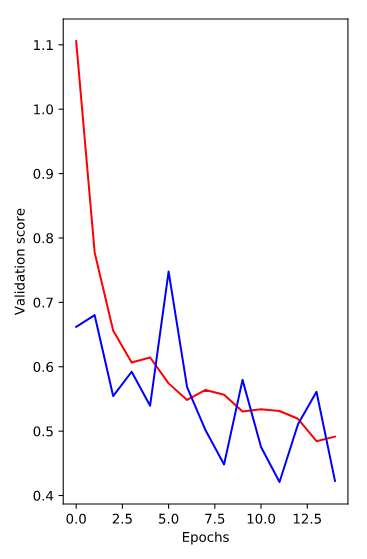

validaton loss is much lower in model 2 (blue), the model with 100 layers vs 10

In [ ]:
## Adding layers to a network
## baseline model called model_1 has 1 hidden layer, with 50 units. 
## create a similar network with 3 hidden layers (still keeping 50 units in each layer).

# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))

model_2.add(Dense(50, activation='relu'))

model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


###### Thinking about model capacity

model/network capacity is closely related to over/under fitting
    - ability to capture predictive patterns in data
    - increase nodes/ layers or layers in network can increase capacity
    
Workflow
- start with a simple network and continue increasing capacity until validation score is no longer improving


###### Stepping up to Images
MNIST dataset, subset (recognizing handwritten digits) - very popular for getting started on image data
    - There is an image of each handwritten digit, and each image is composed of a 28 pixel by 28 pixel grid. 
    - The image is represented by showing how dark each pixel is. So, 0 would be as light as possible, and 255 is as dark as possible. 
    - I've flattened the 28 x 28 grid for you into a 784 x 1 array for each image. 
    - Each image shows a digit like 0, 1, 2, 3 4, all the way up to 9. 
    - Your model will predict which digit it is that was written. 
    - So you will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output. 

In [ ]:
## Building your own digit recognition model

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(X,y, validation_split=0.3)
